# PREDICTIVE ANALYTICS : Weather prediction
### **Nama** : Muhammad Dafa Rachman

# DESKRIPSI PROYEK

Proyek prediksi stroke menggunakan machine learning dan deep learning bertujuan untuk mengidentifikasi individu dengan risiko tinggi mengalami stroke melalui analisis data kesehatan. Dengan memanfaatkan algoritma analisis yang canggih, proyek ini akan mengumpulkan dan menganalisis data tentang faktor risiko seperti hipertensi, diabetes, obesitas, dan pola hidup tidak sehat. Model yang dibangun akan membantu dalam mendeteksi pola dan tren yang mungkin tidak terlihat pada analisis tradisional. Dengan melakukan prediksi yang lebih akurat, proyek ini dapat memfasilitasi intervensi dini dan pencegahan, memungkinkan penyedia layanan kesehatan untuk menangani faktor risiko sebelum kondisi menjadi lebih serius. Selain itu, edukasi dan kampanye kesehatan akan mendukung upaya ini, meningkatkan kesadaran masyarakat tentang pencegahan stroke.

# IMPORT LIBRARY YANG DIGUNAKAN

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Library proses pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Library dalam penerapan SMOTE
from imblearn.over_sampling import SMOTE

# Library penerapan model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, classification_report, auc,
                             precision_recall_curve, average_precision_score)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Library penerapan model deep learning
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, Dense

# DATA UNDERSTANDING

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut. Dalam data understanding ini terdapat beberapa fungsi dari library yang digunakan untuk memahami informasi yang ada pada dataset

## LOAD DATASET

Data loading merupakan tahap krusial dalam proses analisis data yang bertujuan untuk memuat dataset yang akan digunakan, sehingga data menjadi lebih mudah dipahami dan diolah. Pada tahap ini, dataset yang telah dipersiapkan sebelumnya, yang telah melalui proses pembersihan dan normalisasi oleh pembuatnya, siap untuk digunakan. Pembersihan data memastikan bahwa informasi yang terkandung bebas dari kesalahan dan inkonsistensi, sedangkan normalisasi membantu dalam menyelaraskan skala nilai agar siap untuk analisis lebih lanjut. Proses data loading yang efektif juga memfasilitasi integrasi data dari berbagai sumber, meningkatkan efisiensi dan akurasi dalam analisis yang dilakukan.



| Jenis | Keterangan |
| ------ | ------ |
| Title | _Weather Type Classification_ |
| Source | [Kaggle](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data) |
| Maintainer | [Nikhil Narayan](https://www.kaggle.com/nikhil7280) |
| License | Data files © Original Authors |
| Visibility | Publik |
| Tags | _Beginer, Data Visualization, Classification, Exploratory Analysis, Weather and Climate_ |
| View | 60.8k |

In [48]:
data = pd.read_csv('weather_classification_data.csv')

kode diatas digunkan untuk membaca dataset yang berbentuk csv kedalam variabel data yang akan dilakukan analysis pada proses selanjutnya

## DATASET INFO

In [49]:
data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [50]:
# Mengubah spasi menjadi underscore (_) untuk mempermudah analisa dan membangun model
data = data.rename(columns={
    'Precipitation (%)': 'Precipitation',
    'Visibility (km)': 'Visibility'
})

In [51]:
data.columns = data.columns.str.replace(' ', '_')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind_Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud_Cover           13200 non-null  object 
 5   Atmospheric_Pressure  13200 non-null  float64
 6   UV_Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather_Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


- Dataset berupa CSV (Comma-Seperated Values).
- Dataset memiliki 13200 sample dengan 11 fitur.
- Dataset memiliki 5 fitur bertipe float64, 2 fitur bertipe o=int64 dan 4 fitur bertipe object.

Variable - variable pada dataset
- Temperature (numeric): Suhu dalam derajat Celsius, dengan rentang dari suhu sangat dingin hingga sangat panas.

- Humidity (numeric): Persentase kelembaban, termasuk nilai di atas 100% untuk memperkenalkan nilai pencilan (outlier).

- Wind Speed (numeric): Kecepatan angin dalam kilometer per jam.

- Precipitation (%) (numeric): Persentase curah hujan, termasuk nilai outlier.

- Cloud Cover (categorical): Deskripsi tutupan awan.

- Atmospheric Pressure (numeric): Tekanan atmosfer dalam hPa, dengan rentang yang luas.

- UV Index (numeric): Indeks UV, menunjukkan kekuatan radiasi ultraviolet.

- Season (categorical): Musim saat data dicatat.

- Visibility (km) (numeric): Jarak pandang dalam kilometer, termasuk nilai yang sangat rendah atau sangat tinggi.

- Location (categorical): Tipe lokasi tempat data dicatat.

- Weather Type (categorical): Variabel target untuk klasifikasi, yang menunjukkan tipe cuaca.

# DATA UNDERSTANDING (EDA)

## INFORMATION DATASET

In [53]:
data.shape

(13200, 11)

In [54]:
data.describe()

Temperature      Humidity    Wind_Speed  Precipitation  \
count  13200.000000  13200.000000  13200.000000   13200.000000   
mean      19.127576     68.710833      9.832197      53.644394   
std       17.386327     20.194248      6.908704      31.946541   
min      -25.000000     20.000000      0.000000       0.000000   
25%        4.000000     57.000000      5.000000      19.000000   
50%       21.000000     70.000000      9.000000      58.000000   
75%       31.000000     84.000000     13.500000      82.000000   
max      109.000000    109.000000     48.500000     109.000000   

       Atmospheric_Pressure      UV_Index    Visibility  
count          13200.000000  13200.000000  13200.000000  
mean            1005.827896      4.005758      5.462917  
std               37.199589      3.856600      3.371499  
min              800.120000      0.000000      0.000000  
25%              994.800000      1.000000      3.000000  
50%             1007.650000      3.000000      5.000000  
75%             1016.772500      7.000000      7.500000  
max             1199.210000     14.000000     20.000000

Tabel diatas merupakan informasi mengenai dataset yang sigunakan :
- Kolom Temperature mencatat suhu dalam derajat Celsius. Rata-rata suhu adalah 19,13°C, dengan nilai minimum mencapai -25°C yang menunjukkan adanya suhu ekstrem yang mungkin disebabkan oleh kesalahan data atau kondisi yang sangat jarang. Nilai maksimum tercatat mencapai 109°C, yang merupakan nilai ekstrem dan perlu diperiksa lebih lanjut karena suhu tersebut sangat tinggi untuk kondisi normal. Median suhu berada pada angka 21°C, menunjukkan sebagian besar data berada pada kisaran suhu yang lebih normal.

- Kolom Humidity mencatat persentase kelembaban udara. Rata-rata kelembaban adalah 68,71%, dengan nilai minimum 20% dan maksimum 109%, yang menunjukkan adanya outlier. Nilai kelembaban di atas 100% bisa menunjukkan adanya kesalahan pengukuran atau data yang tidak konsisten. Median kelembaban berada pada 70%, menunjukkan bahwa setengah dari data berada pada tingkat kelembaban di bawah 70%.

- Kecepatan angin tercatat dengan rata-rata 9,83 km/jam. Nilai minimum menunjukkan kecepatan angin yang sangat rendah (0 km/jam), sedangkan nilai maksimum menunjukkan kecepatan angin yang tidak realistis (48,5 km/jam). Rata-rata kecepatan angin cukup moderat, namun data ini juga memiliki outlier yang perlu diperhatikan lebih lanjut.

- Kolom Precipitation (%) mengukur persentase curah hujan. Nilai rata-rata curah hujan adalah 53,64%, dengan nilai minimum 0% (tidak ada hujan) dan nilai maksimum 109%, yang menandakan adanya outlier. Ini menunjukkan bahwa sebagian besar data mencatatkan hujan dengan persentase moderat, namun juga terdapat outlier yang menunjukkan curah hujan yang sangat tinggi.

- Tekanan atmosfer tercatat dengan rata-rata 1005,83 hPa, dengan nilai minimum 800,12 hPa dan maksimum 1199,21 hPa. Rata-rata menunjukkan tekanan atmosfer yang cukup stabil, tetapi rentang nilai yang luas dapat menunjukkan variasi besar dalam data, termasuk kemungkinan outlier pada nilai maksimum.

- indeks UV, yang menunjukkan intensitas radiasi ultraviolet, memiliki rata-rata 4,01, dengan nilai minimum 0 dan maksimum 14. Nilai maksimum yang tinggi perlu diperiksa lebih lanjut, karena mungkin mencerminkan kejadian ekstrim atau kesalahan data. Median indeks UV adalah 3, yang menunjukkan kondisi UV pada kisaran sedang di sebagian besar data.

- Kolom Visibility mencatatkan jarak pandang dalam kilometer, dengan nilai rata-rata 5,46 km. Nilai minimum adalah 0 km dan maksimum mencapai 20 km, menunjukkan rentang jarak pandang yang sangat bervariasi, dengan kemungkinan besar adanya outlier.



## PENGECEKAN DATA DUPLIKAT DAN KOSONG

Pada proses ini melakukan pengecekan dataset apakah terdapat data duplikat dan kosong pada dataset stroke yang digunakan. Proses ini sangat penting untuk melakukan analysis kedepannya sehingga dapat menghasilkan model yang baik

In [55]:
duplikat = data.duplicated()
print(duplikat.sum())

0


Dalam dataset ini menunjukkan tidak adanya data yang teduplikat

In [56]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind_Speed              0
Precipitation           0
Cloud_Cover             0
Atmospheric_Pressure    0
UV_Index                0
Season                  0
Visibility              0
Location                0
Weather_Type            0
dtype: int64

Dapat dilihat pada tabel hasil kode diatas, bahwa tidak terdapat data yang kosong

## PENGECEKAN VALUE UNIK YANG ADA PADA DATASET

In [57]:
data.nunique().sort_values(ascending=False)

Atmospheric_Pressure    5456
Temperature              126
Precipitation            110
Wind_Speed                97
Humidity                  90
Visibility                41
UV_Index                  15
Cloud_Cover                4
Season                     4
Weather_Type               4
Location                   3
dtype: int64

Tabel diatas merupakan jumlah value yang unik pada masing masing kolom yangterdapat pada dataset

## VISUALISASI (MULTIVARIATE ANALYSIS)

### KORELASI PADA DATASET NUMERIK

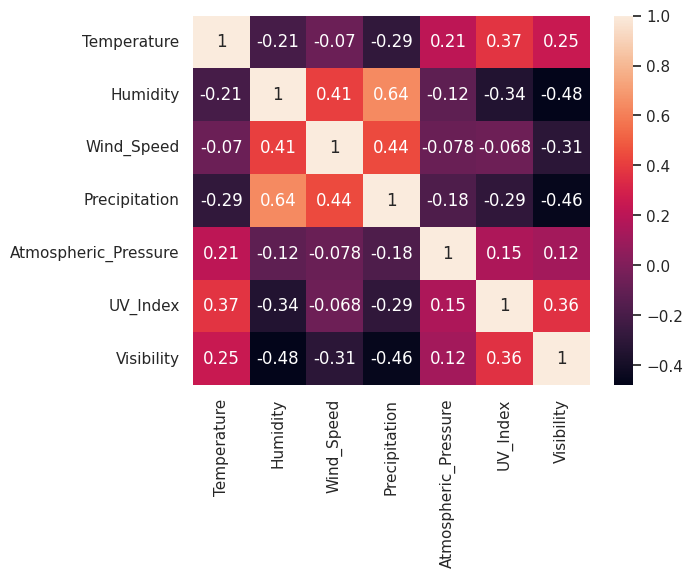

In [58]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

- Humidity dan Precipitation memiliki korelasi positif yang kuat (0.64), yang menunjukkan bahwa semakin tinggi kelembaban, semakin tinggi pula kemungkinan curah hujan.

- Wind Speed memiliki korelasi positif dengan Precipitation (0.44), yang mengindikasikan bahwa kecepatan angin mungkin sedikit berpengaruh terhadap curah hujan.

- Temperature dan UV Index memiliki korelasi positif (0.37), yang menunjukkan bahwa suhu yang lebih tinggi cenderung terkait dengan peningkatan intensitas radiasi UV.

- Visibility memiliki korelasi negatif dengan Humidity (-0.48) dan Precipitation (-0.46), yang menunjukkan bahwa pada kondisi kelembaban atau hujan yang lebih tinggi, jarak pandang cenderung berkurang.


### PERBANDINGAN Season dengan Weather Type

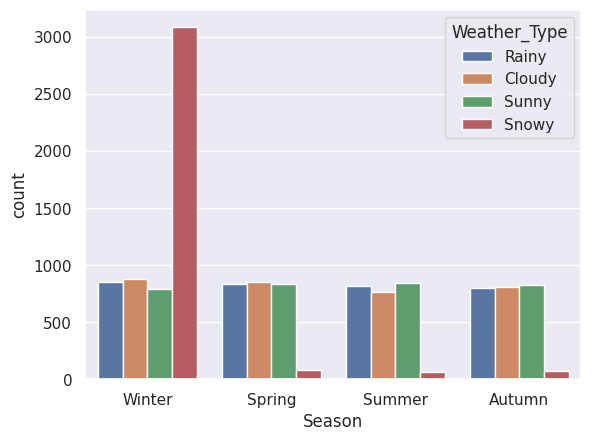

In [59]:
sns.countplot(x='Season',hue='Weather_Type', data=data)
plt.show()

- Winter didominasi oleh Snowy, sementara cuaca Sunny lebih sering terjadi pada musim Spring, Summer, dan Autumn.

- Rainy dan Cloudy tercatat lebih merata di semua musim

## VISUALISASI (UNIVARIATE ANALYSIS)

### VISUALISASI DISTRIBUSI KOLOM

#### VISUALISASI Cloud_Cover

In [60]:
print(data.Cloud_Cover.value_counts())

Cloud_Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64


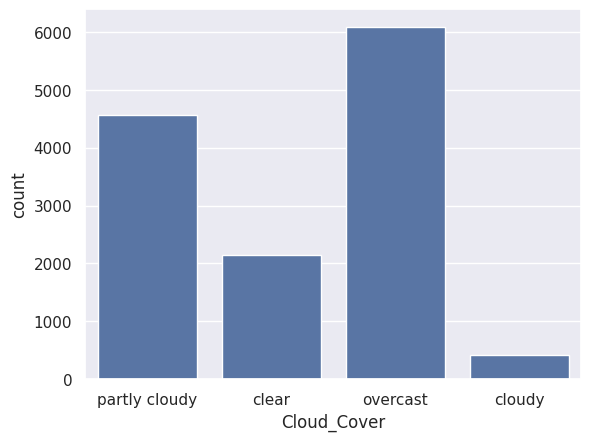

In [61]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Cloud_Cover")
plt.show()

Gambar diatas menampilkan grafik dari persebaran cloud cover. Pada gambar menunjukkan bahwa sebagian besar data dalam dataset tercatat pada kondisi dengan awan yang tertutup

#### VISUALISASI Season

In [62]:
print(data.Season.value_counts())

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


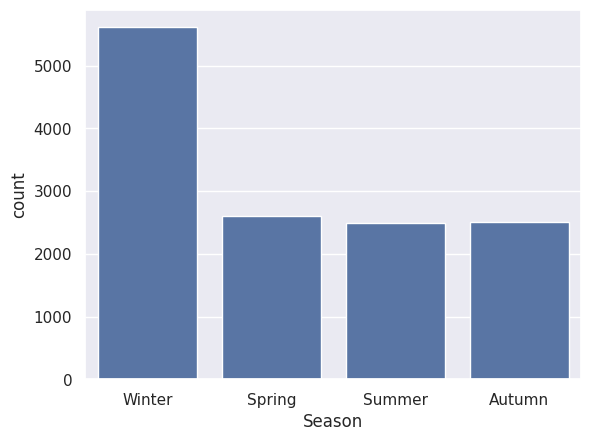

In [63]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Season")
plt.show()

Gambar ini menunjukkan bahwa sebagian besar datset dikumpulkan pada musim dingin.

#### VISUALISASI Location

In [64]:
print(data.Location.value_counts())

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64


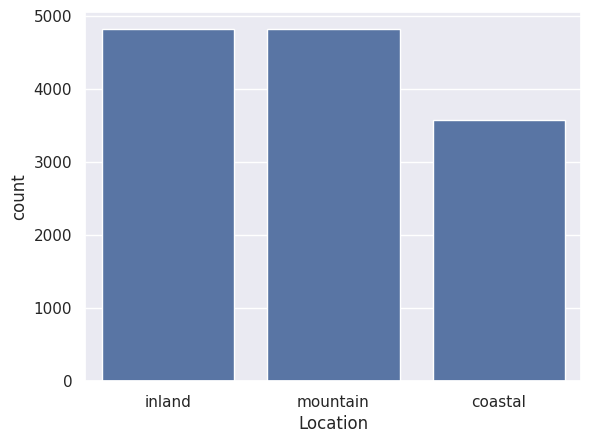

In [65]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Location")
plt.show()

Gambar diatas menampilkan grafik dari persebaran pencatatan lokasi.

#### VISUALISASI Weather Type

In [66]:
print(data.Weather_Type.value_counts())

Weather_Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


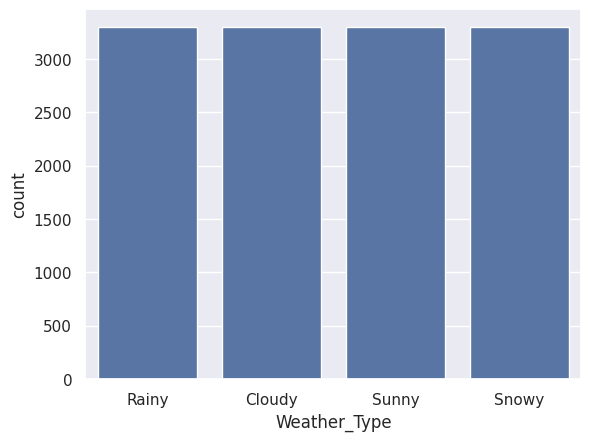

In [67]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Weather_Type")
plt.show()

Gambar diatas menampilkan grafik dari persebaran wether type yang akan digunakan sebagai label target. Gambar ini menunjukkan bahwa persebaran data sudah setara.

### DISTRIBUSI DATA PADA DATASET NUMERICAL

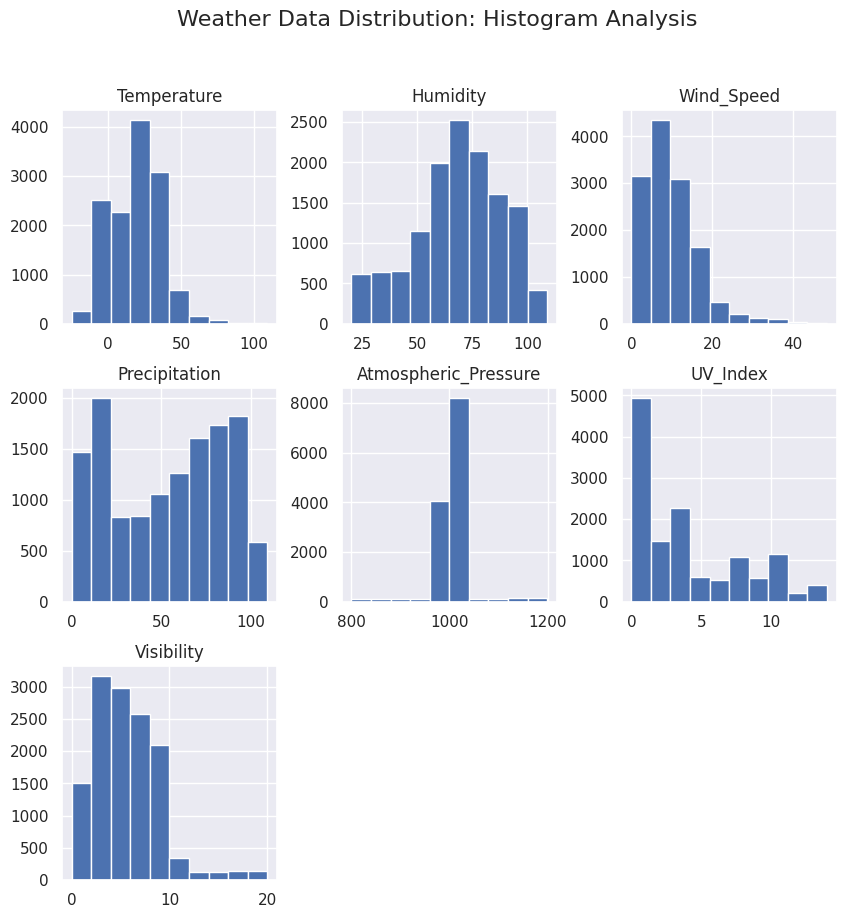

In [68]:
data.hist(figsize=(10,10))
plt.suptitle('Weather Data Distribution: Histogram Analysis', fontsize=16)
plt.show()

Sebagian besar data berada pada nilai sedang untuk beberapa variabel seperti Temperature, Humidity, dan Wind Speed, sedangkan beberapa kolom seperti UV Index dan Visibility menunjukkan distribusi yang lebih banyak pada nilai rendah

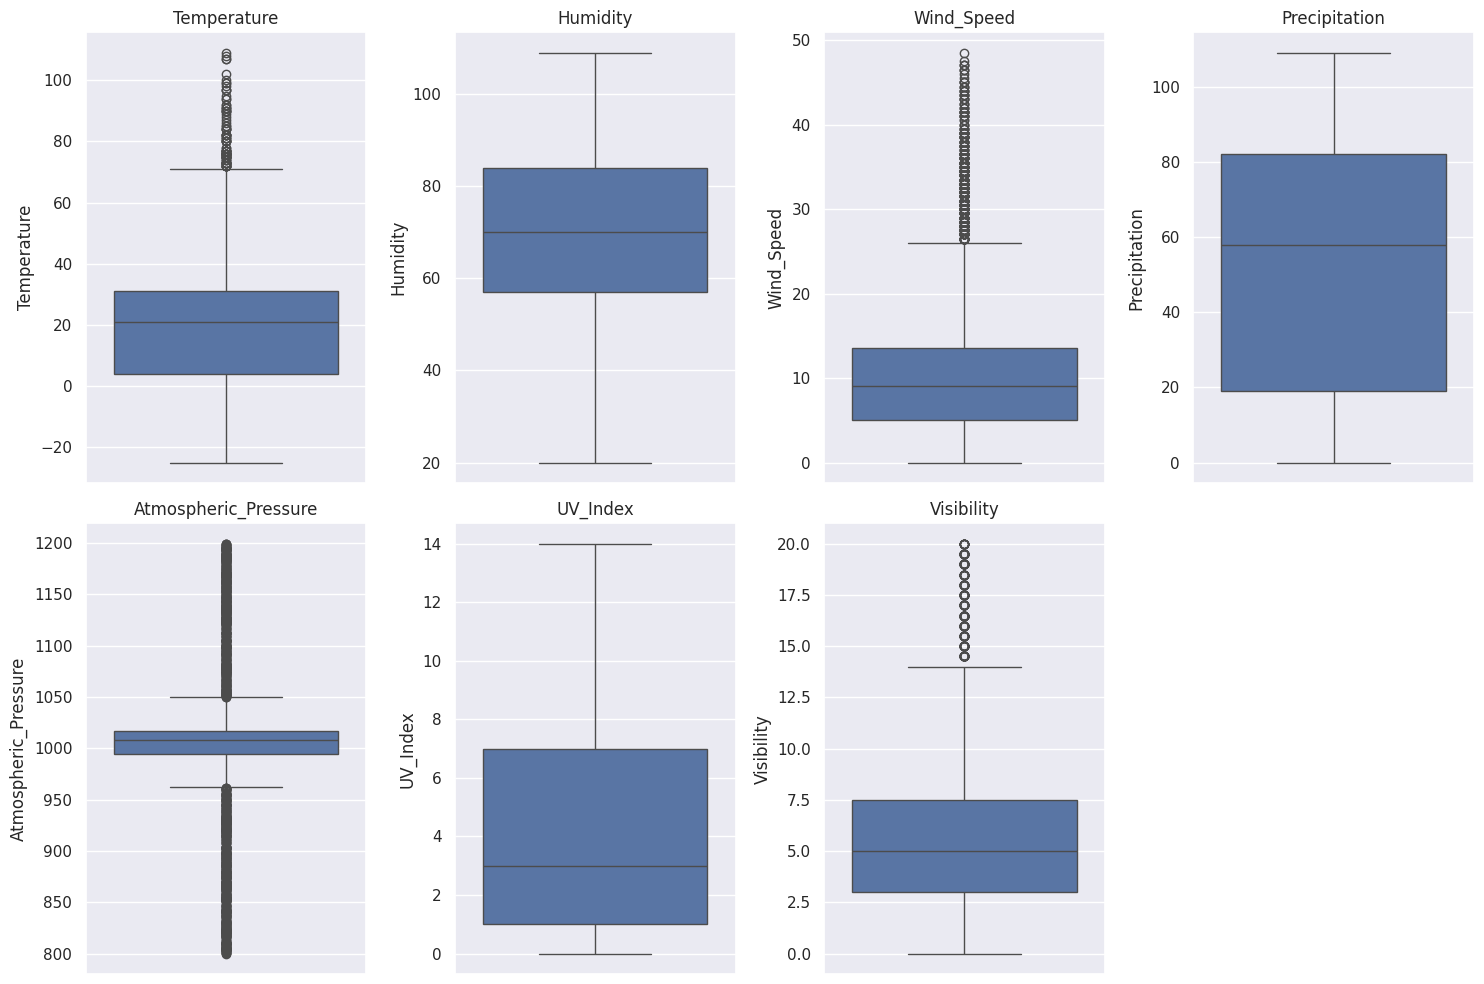

In [69]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a boxplot
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col_name])
    plt.title(col_name)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

Terdapat banyak outliers di sebagian besar kolom, terutama pada Wind Speed, Temperature, Precipitation, Atmospheric Pressure, dan Visibility. Outlier akan ditangani karena pada informasi sebelumnya terdapat data data yang ekstrim.

#### Handling Outlier

In [70]:
# handling with IQR
Q1 = data[numerical_columns].quantile(0.25)
print(Q1)
Q3 = data[numerical_columns].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

for col in numerical_columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data[col] = np.clip(data[col], lower_bound, upper_bound)

Temperature               4.0
Humidity                 57.0
Wind_Speed                5.0
Precipitation            19.0
Atmospheric_Pressure    994.8
UV_Index                  1.0
Visibility                3.0
Name: 0.25, dtype: float64
Temperature               31.0000
Humidity                  84.0000
Wind_Speed                13.5000
Precipitation             82.0000
Atmospheric_Pressure    1016.7725
UV_Index                   7.0000
Visibility                 7.5000
Name: 0.75, dtype: float64
Temperature             27.0000
Humidity                27.0000
Wind_Speed               8.5000
Precipitation           63.0000
Atmospheric_Pressure    21.9725
UV_Index                 6.0000
Visibility               4.5000
dtype: float64


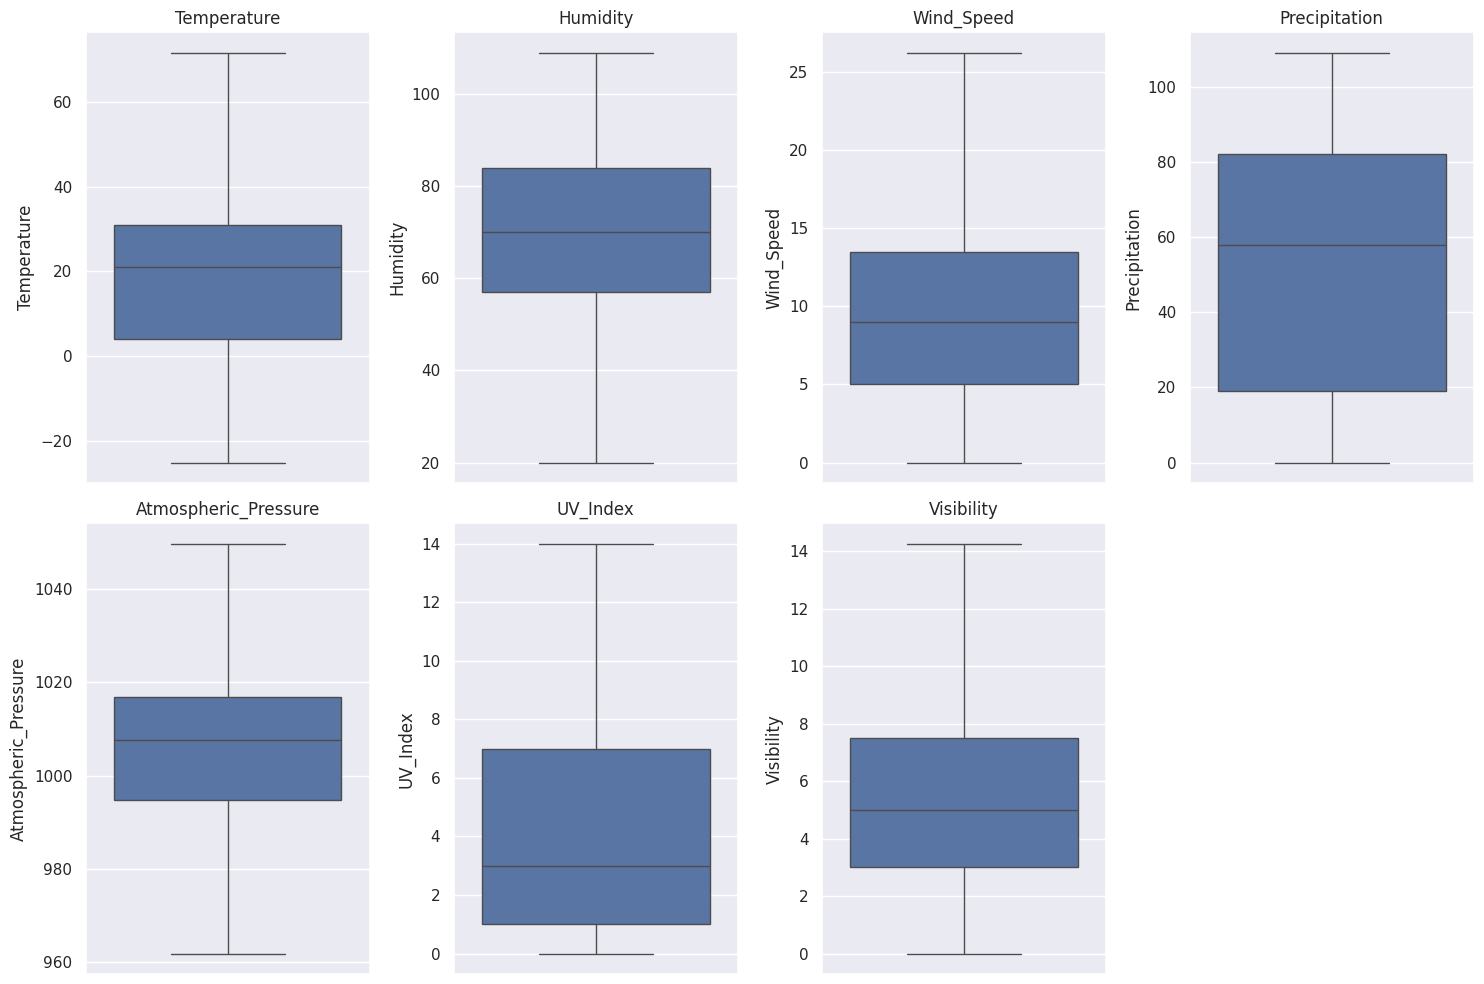

In [71]:
# Melihat kembali apakah ada outlier

# numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a boxplot
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col_name])
    plt.title(col_name)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

- Penanganan Outlier berhasil menghilangkan nilai-nilai ekstrim yang dapat mempengaruhi hasil analisis dan model prediksi.

- Distribusi data sekarang lebih normal, dengan rentang yang lebih konsisten untuk masing-masing variabel.

- Dengan penanganan ini, model yang dikembangkan nantinya dapat memberikan hasil yang lebih stabil dan akurat, karena data yang lebih bersih dan terstruktur.

### PERBANDINGAN Temperature dengan Weather Type

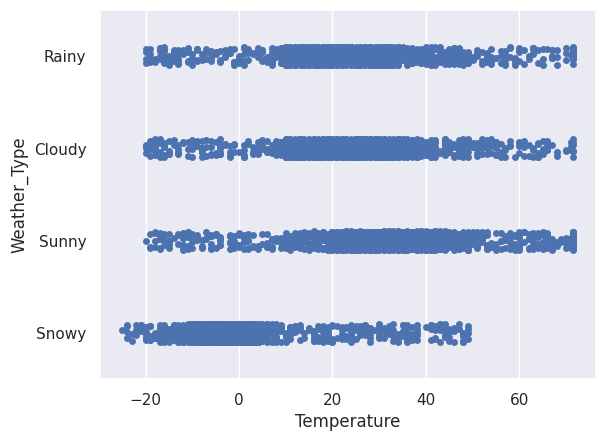

In [72]:
# Visualisasi menggunakan stripplot
sns.stripplot(x='Temperature', y='Weather_Type', data=data, jitter=True)

# Menampilkan plot
plt.show()

Gambar ini menunjukkan hubungan antara Temperature dan Weather Type, dengan kondisi cuaca Snowy terpusat pada suhu yang dingin.

### Distribusi Data

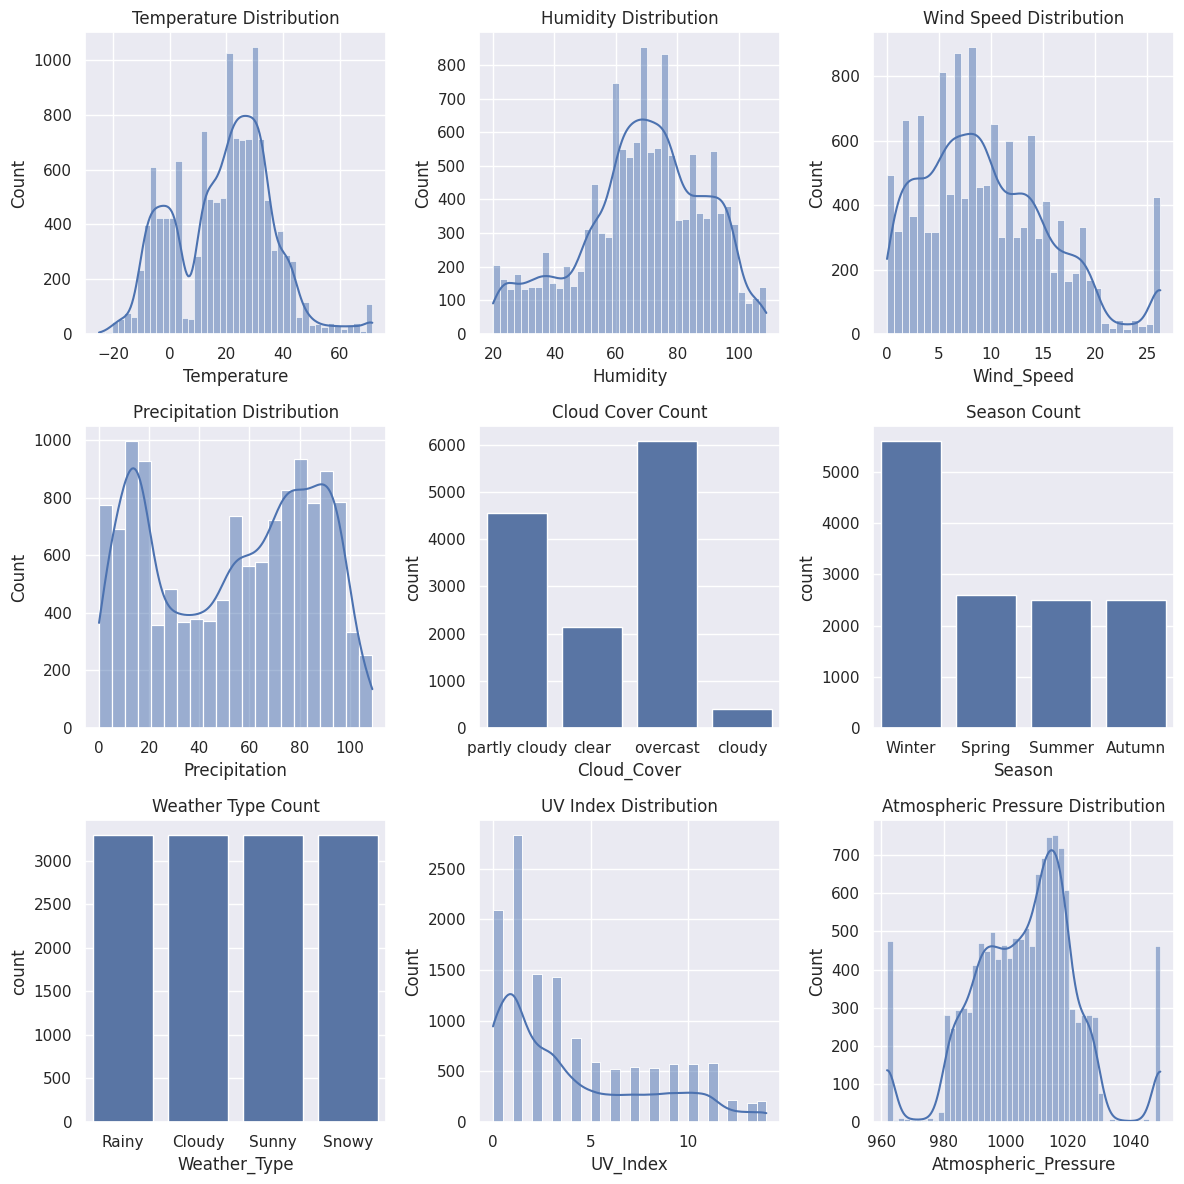

In [73]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# numerical columns
sns.histplot(data=data["Temperature"], ax=axs[0, 0], kde=True).set_title('Temperature Distribution')
sns.histplot(data=data["Humidity"], ax=axs[0, 1], kde=True).set_title('Humidity Distribution')
sns.histplot(data=data["Wind_Speed"], ax=axs[0, 2], kde=True).set_title('Wind Speed Distribution')
sns.histplot(data=data["Precipitation"], ax=axs[1, 0], kde=True).set_title('Precipitation Distribution')

# Plot categorical columns
sns.countplot(x=data["Cloud_Cover"], ax=axs[1, 1]).set_title('Cloud Cover Count')
sns.countplot(x=data["Season"], ax=axs[1, 2]).set_title('Season Count')
sns.countplot(x=data["Weather_Type"], ax=axs[2, 0]).set_title('Weather Type Count')

# Plot UV Index, Atmospheric Pressure, and Visibility
sns.histplot(data=data["UV_Index"], ax=axs[2, 1], kde=True).set_title('UV Index Distribution')
sns.histplot(data=data["Atmospheric_Pressure"], ax=axs[2, 2], kde=True).set_title('Atmospheric Pressure Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

- Kolom seperti Humidity, Wind Speed, dan UV Index menunjukkan distribusi yang lebih konsisten dan normal, sementara kolom lain seperti Temperature dan Precipitation menunjukkan variasi yang lebih besar.

- Beberapa kategori, seperti Cloud Cover dan Season, menunjukkan ketidakseimbangan dalam jumlah data, dengan beberapa kondisi atau musim lebih sering tercatat.

## VISUALISASI (BIVARIATE ANALYSIS)

membagi kolom kategori dan numerikal

In [74]:
category_columns = ["Cloud_Cover", "Season", "Weather_Type"]
# numerical_columns sudah dilakukan pembagian sebelumnya

### Temperature vs Humidity dengan Weather_Type

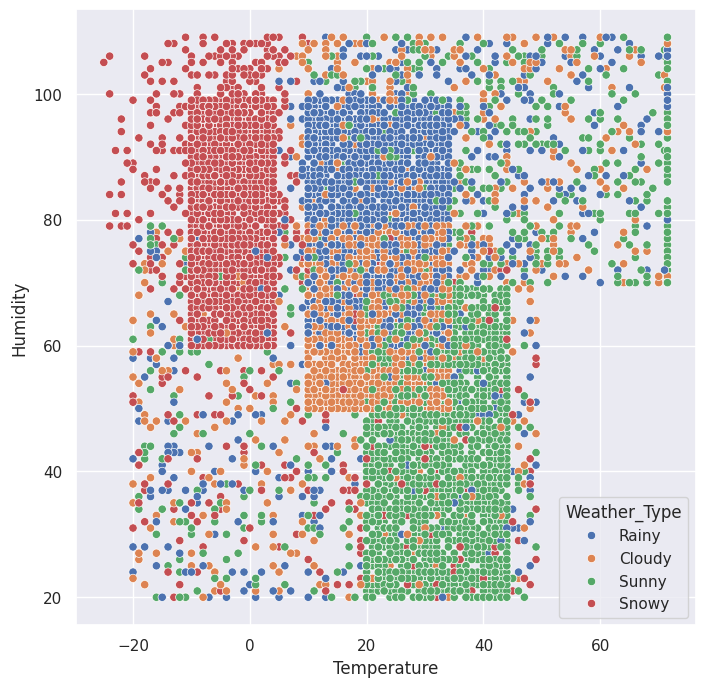

In [75]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'Temperature', y = 'Humidity', hue='Weather_Type')
plt.show()

- Weather Type memiliki hubungan dengan Temperature dan Humidity.

- Rainy cenderung terjadi pada suhu rendah dan kelembaban tinggi.

- Cloudy lebih umum pada suhu dan kelembaban sedang.

- Sunny terkait dengan suhu yang lebih tinggi dan kelembaban rendah.

- Snowy terjadi lebih sering pada suhu rendah dengan kelembaban yang tinggi.

### Wind_Speed vs Precipitation dengan Weather_Type

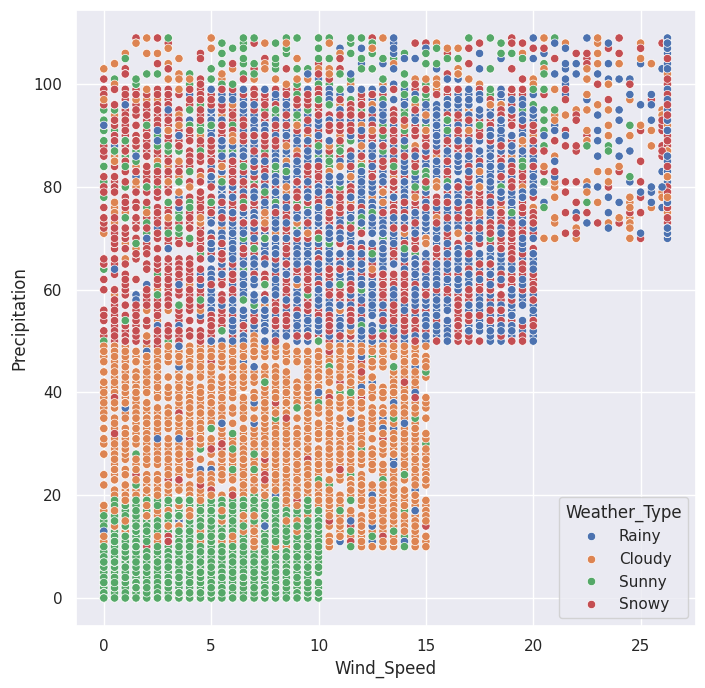

In [76]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'Wind_Speed', y = 'Precipitation', hue='Weather_Type')
plt.show()

- Rainy lebih sering terjadi pada curah hujan tinggi dan angin yang lebih rendah.

- Cloudy memiliki distribusi yang lebih luas dengan curah hujan bervariasi dan kecepatan angin sedang.

- Sunny hampir selalu terkait dengan kecepatan angin rendah dan curah hujan rendah.

- Snowy terjadi pada kondisi serupa dengan Rainy, tetapi dengan suhu yang lebih rendah dan curah hujan yang lebih tinggi.

### Temperature Vs Wind Speed dengan Weather Type

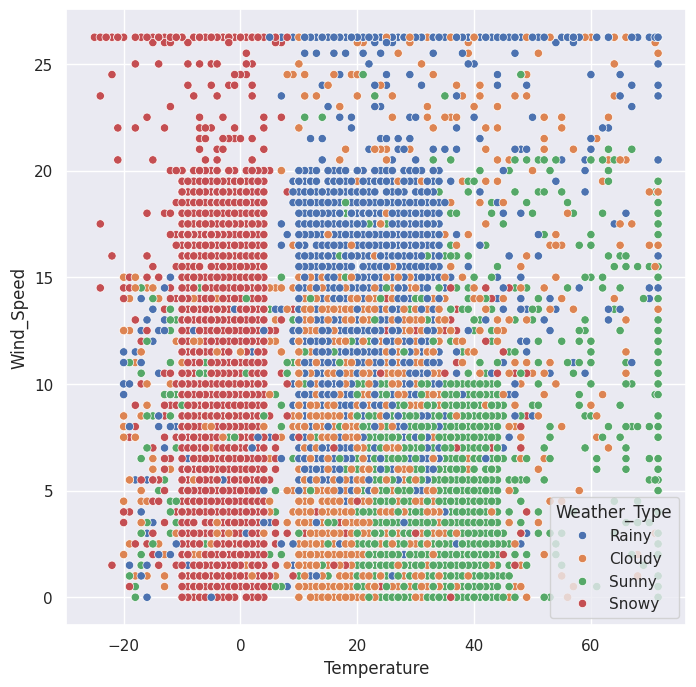

In [77]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'Temperature', y = 'Wind_Speed', hue='Weather_Type')
plt.show()

- Rainy lebih sering terjadi pada suhu dingin dan angin rendah.

- Cloudy terdistribusi pada suhu sedang dengan angin yang tidak terlalu kencang.

- Sunny cenderung terjadi pada suhu panas dengan angin rendah.

- Snowy terjadi pada suhu rendah dan angin rendah hingga sedang.

### PAIR PLOT KESELURUHAN

<Figure size 1000x1000 with 0 Axes>

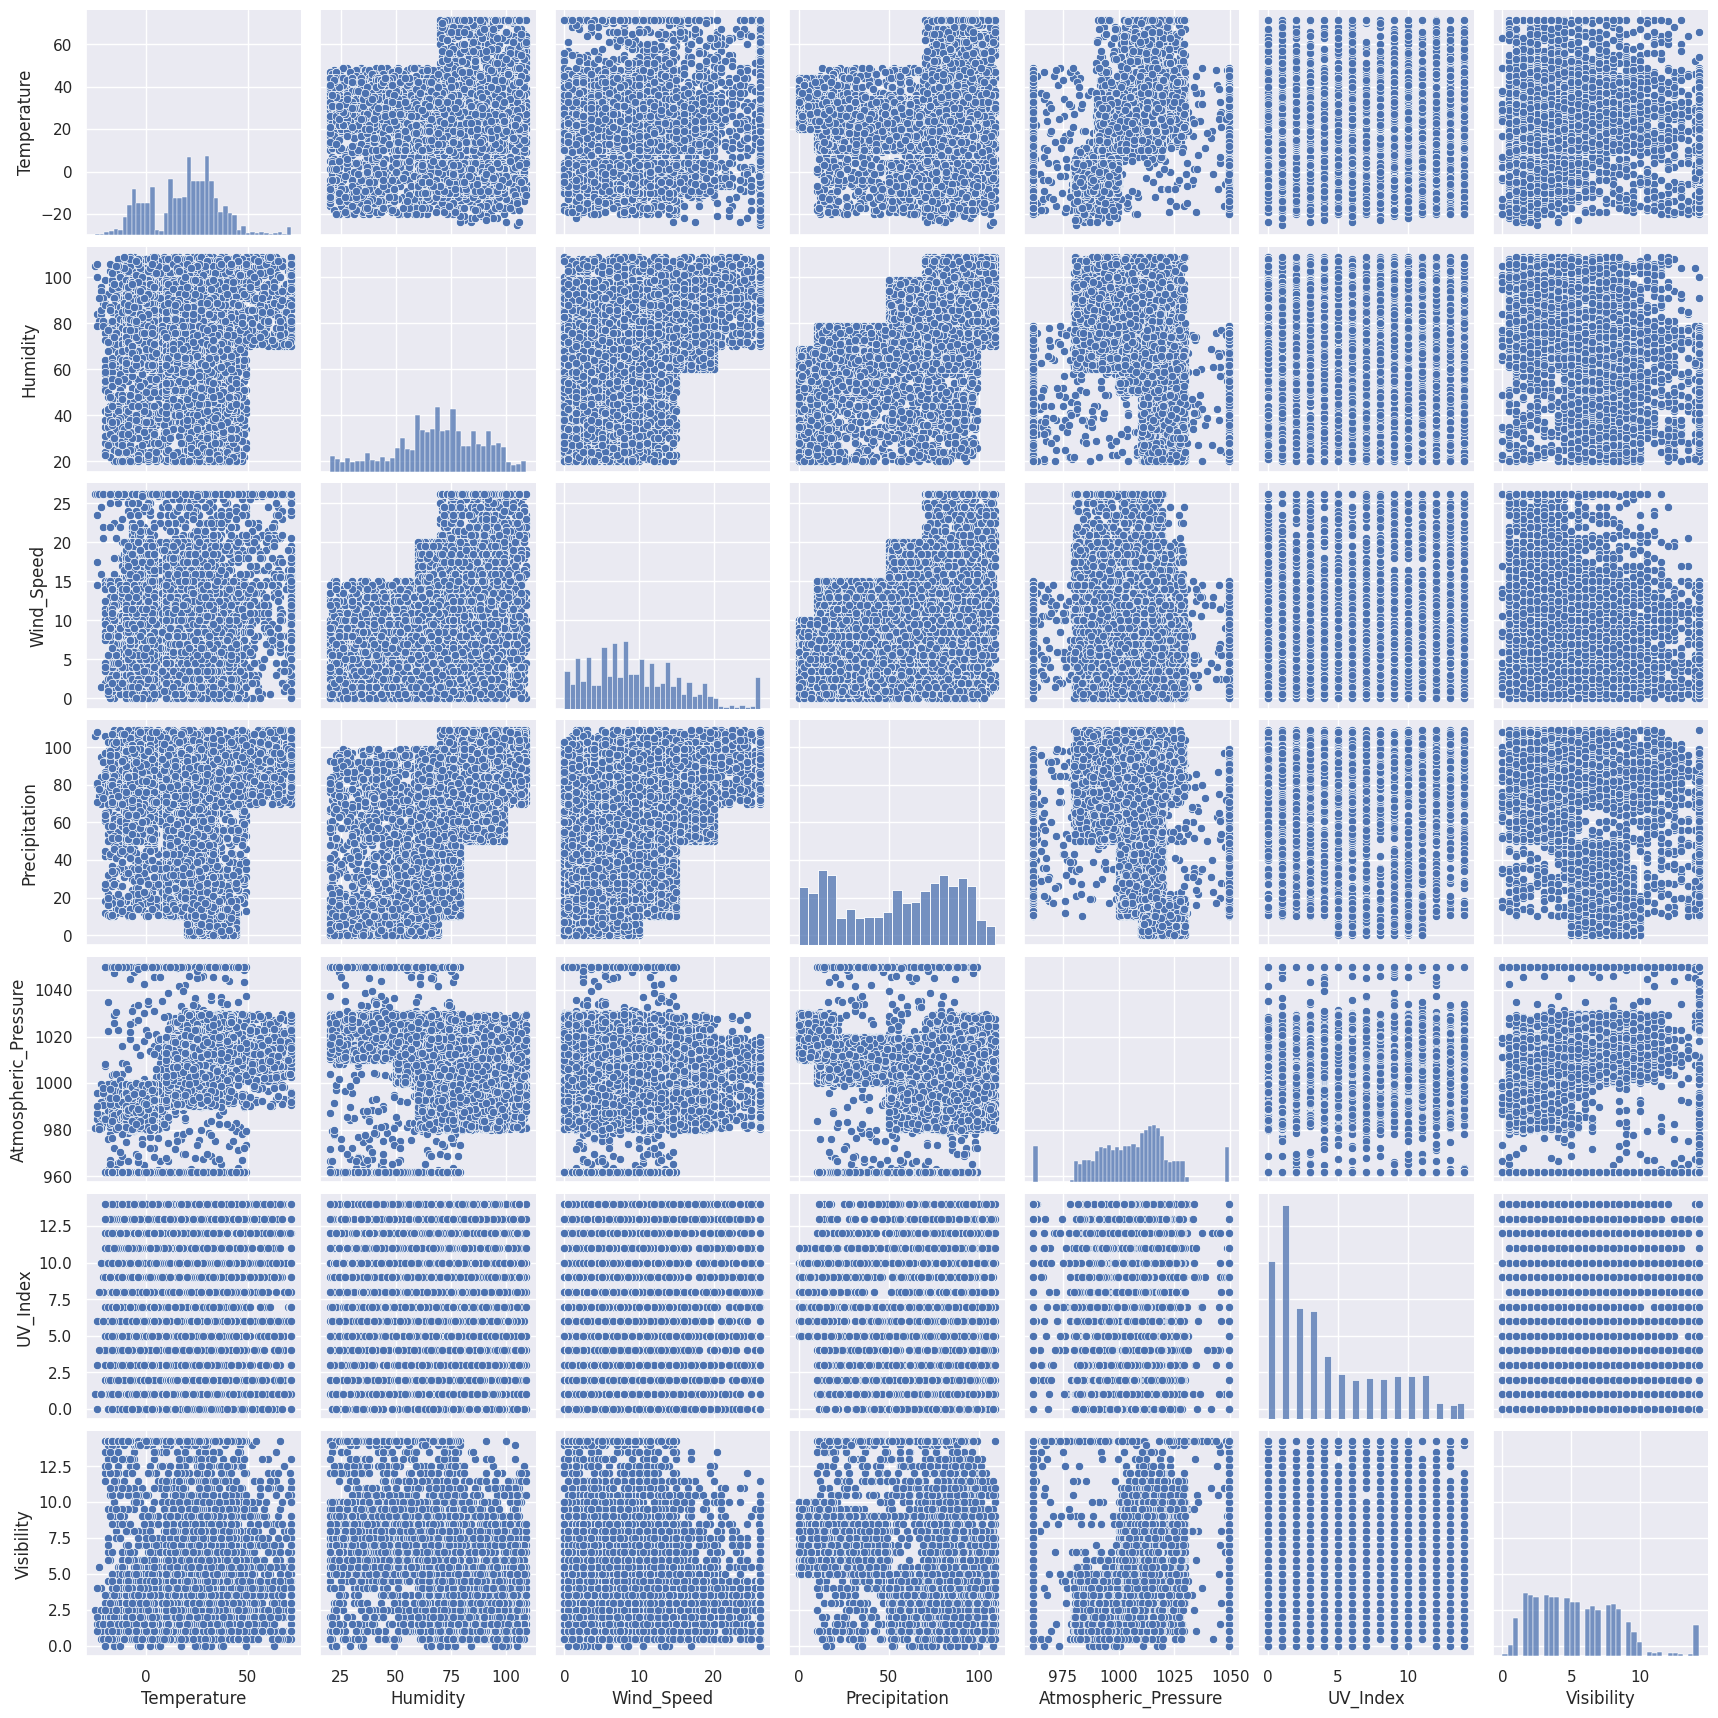

In [78]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

- -Beberapa kolom seperti Wind Speed dan Precipitation menunjukkan distribusi yang sangat terpusat, sedangkan variabel lain memiliki distribusi yang lebih normal.

- Beberapa variabel seperti Temperature dan Humidity atau Precipitation dan Wind Speed menunjukkan hubungan yang cukup kuat, yang dapat membantu dalam membangun model yang lebih efisien.

# DATA PREPARATION (PRE-PROCESSING)

## ENCODING

### ENCODING LABEL

In [79]:
label_encoder = LabelEncoder()
data['Season'] = label_encoder.fit_transform(data['Season'])
data['Weather_Type'] = label_encoder.fit_transform(data['Weather_Type'])

### OnehotEncoding

In [80]:
categorical_columns = ['Cloud_Cover', 'Location']
# Inisialisasi OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Melakukan encoding pada kolom 'Season' dan 'Location'
encoded_columns = onehot_encoder.fit_transform(data[['Cloud_Cover', 'Location']])

# Membuat kolom-kolom baru untuk hasil encoding
encoded_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(['Cloud_Cover', 'Location']))

# Gabungkan hasil encoding dengan data asli
data = pd.concat([data, encoded_df], axis=1)

In [81]:
data.head()

Temperature  Humidity  Wind_Speed  Precipitation    Cloud_Cover  \
0         14.0        73         9.5           82.0  partly cloudy   
1         39.0        96         8.5           71.0  partly cloudy   
2         30.0        64         7.0           16.0          clear   
3         38.0        83         1.5           82.0          clear   
4         27.0        74        17.0           66.0       overcast   

   Atmospheric_Pressure  UV_Index  Season  Visibility  Location  Weather_Type  \
0               1010.82         2       3         3.5    inland             1   
1               1011.43         7       1        10.0    inland             0   
2               1018.72         5       1         5.5  mountain             3   
3               1026.25         7       1         1.0   coastal             3   
4                990.67         1       3         2.5  mountain             1   

   Cloud_Cover_clear  Cloud_Cover_cloudy  Cloud_Cover_overcast  \
0                0.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                1.0                 0.0                   0.0   
3                1.0                 0.0                   0.0   
4                0.0                 0.0                   1.0   

   Cloud_Cover_partly cloudy  Location_coastal  Location_inland  \
0                        1.0               0.0              1.0   
1                        1.0               0.0              1.0   
2                        0.0               0.0              0.0   
3                        0.0               1.0              0.0   
4                        0.0               0.0              0.0   

   Location_mountain  
0                0.0  
1                0.0  
2                1.0  
3                0.0  
4                1.0

## SPLITING DATASET

In [82]:
x = data.drop(columns=["Weather_Type", "Cloud_Cover", "Location"])
y = data["Weather_Type"]

In [83]:
print(x.dtypes)

Temperature                  float64
Humidity                       int64
Wind_Speed                   float64
Precipitation                float64
Atmospheric_Pressure         float64
UV_Index                       int64
Season                         int64
Visibility                   float64
Cloud_Cover_clear            float64
Cloud_Cover_cloudy           float64
Cloud_Cover_overcast         float64
Cloud_Cover_partly cloudy    float64
Location_coastal             float64
Location_inland              float64
Location_mountain            float64
dtype: object


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [85]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (10560, 15)
Number transactions y_train dataset:  (10560,)
Number transactions x_test dataset:  (2640, 15)
Number transactions y_test dataset:  (2640,)


Train Test Split menggunakan library sklearn.model_selection untuk membagi dataset menjadi data latih dan data uji dengan pembagian sebesar 20:80 dan random state sebesar 0. Semua proses ini diperlukan dalam rangka membuat model yang baik.

## PERBAIKAN VALUE YANG TIDAK BALANCE DENGAN SMOTE

Karena ada persebaran data yang menunjukkan pencatatan yang lebih banyak pada satu musim atau yang lainnya, akan dilakukannya perbaikan value yang tidak balance

In [86]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2618
Before OverSampling, counts of label '0': 2641 

After OverSampling, the shape of train_X: (10660, 15)
After OverSampling, the shape of train_y: (10660,) 

After OverSampling, counts of label '1': 2665
After OverSampling, counts of label '0': 2665


# PEMODELAN ALGORITMA

In [87]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

In [88]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    precision = precision_score(y_test, y_pred, average='macro')  # Precision untuk multiclass
    recall = recall_score(y_test, y_pred, average='macro')  # Recall untuk multiclass
    f1 = f1_score(y_test, y_pred, average='macro')  # F1 Score untuk multiclass

    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('-----------------------------------')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[505  75  21  58]
 [ 14 611  32  25]
 [ 13  16 610  25]
 [ 30  38  16 551]]
Accuracy Score:  0.8625
K-Fold Validation Mean Accuracy: 84.04 %
Standard Deviation: 0.89 %
Precision: 0.86
Recall: 0.86
F1: 0.86
-----------------------------------
-----------------------------------
SVM :
[[508  97  17  37]
 [ 41 594  35  12]
 [ 15   6 628  15]
 [ 31  99  19 486]]
Accuracy Score:  0.8393939393939394
K-Fold Validation Mean Accuracy: 82.50 %
Standard Deviation: 0.91 %
Precision: 0.85
Recall: 0.84
F1: 0.84
-----------------------------------
-----------------------------------
KNeighbors :
[[560  57   9  33]
 [ 34 626   7  15]
 [ 18  16 618  12]
 [ 27  31  12 565]]
Accuracy Score:  0.8973484848484848
K-Fold Validation Mean Accuracy: 88.37 %
Standard Deviation: 0.98 %
Precision: 0.90
Recall: 0.90
F1: 0.90
-----------------------------------
-----------------------------------
GaussianNB :
[[557  88   7   7]
 [ 49 555  73   5]
 [ 24  19 611  10]
 [182  28   8 417]]
Accuracy

## Evaluasi

In [89]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'Precision', 'Recall', 'F1'])

In [90]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [91]:
df

Model   Accuracy  K-Fold Mean Accuracy  Std. Deviation  \
7              XGBoost  92.310606             91.145833        0.745945   
6        Random Forest  91.818182             91.458333        0.978454   
5        Decision Tree  90.909091             90.454545        0.970170   
2           KNeighbors  89.734848             88.371212        0.977537   
0  Logistic Regreesion  86.250000             84.043561        0.886568   
1                  SVM  83.939394             82.500000        0.914010   
3           GaussianNB  81.060606             81.089015        0.895425   
4          BernoulliNB  66.893939             66.392045        0.804032   

   Precision    Recall        F1  
7   0.923285  0.923082  0.923047  
6   0.918535  0.918217  0.918300  
5   0.909134  0.909252  0.909131  
2   0.898640  0.897037  0.897472  
0   0.864687  0.862150  0.861645  
1   0.845519  0.838243  0.838937  
3   0.828575  0.808969  0.809858  
4   0.705650  0.668794  0.680106

Gambar tabel diatas merupakan hasil dari pengurutan evaluasi yang dilakukan, dapat dilihat bahwa XGBoost merupakan model yang mendapat akurasi tertinggi daripada model yang lainnya.

# KESIMPULAN

Model XGBoost menunjukkan performa terbaik dengan akurasinya 92.31%, diikuti oleh Random Forest dengan 91.82% dan Decision Tree dengan 90.9%. Model-model ini unggul berkat kemampuannya dalam menangkap pola kompleks dan mengatasi variabilitas dalam data, dengan XGBoost dan Random Forest menggunakan teknik ensemble untuk mengurangi risiko overfitting. KNeighbors juga menunjukkan kinerja yang baik dengan akurasi 89.73%, meskipun sedikit lebih rendah dibandingkan model ensemble.

Sementara itu, model Logistic Regression dan SVM memberikan hasil yang lebih rendah, dengan SVM mencapai 83.93% dan Logistic Regression 86.25%. Meskipun hasilnya cukup baik, keduanya kalah dibandingkan dengan model ensemble yang lebih kompleks. Model GaussianNB dan BernoulliNB memiliki performa terendah, dengan GaussianNB mencatat 81.06% dan BernoulliNB hanya 66.89%, yang menunjukkan keterbatasan mereka dalam menangani data yang lebih kompleks.

Secara keseluruhan, XGBoost dan Random Forest tetap menjadi pilihan terbaik berdasarkan akurasi dan keseimbangan antara Precision, Recall, dan F1-Score, menunjukkan kemampuan mereka dalam menangani dataset yang lebih besar dan lebih beragam. Model seperti Decision Tree dan KNeighbors memberikan alternatif yang baik, tetapi dengan sedikit penurunan dalam performa, sedangkan model Logistic Regression dan SVM lebih cocok untuk kasus yang lebih sederhana dengan dataset yang lebih kecil.

------------------------------------------------------------------------